# Importing packages and files

In [1]:
import json
import requests
import graphviz
from IPython.display import display
from anytree.exporter import DotExporter

URL = "127.0.0.1"
PORT = 8001

In [2]:
with open("bpmn_test_api.json", "r") as f:
    bpmn_file = f.read()

bpmn = json.loads(bpmn_file)

# Initialize petri net and execution tree

In [3]:
request_json = {
    "bpmn": bpmn
}

response = requests.post(f"http://{URL}:{PORT}/execute", headers={"Content-Type": "application/json"}, json=request_json)
response_json = response.json()

In [4]:
bpmn = response_json['bpmn']
petri_net = response_json['petri_net']
petri_net_dot = response_json['petri_net_dot']
execution_tree = response_json['execution_tree']

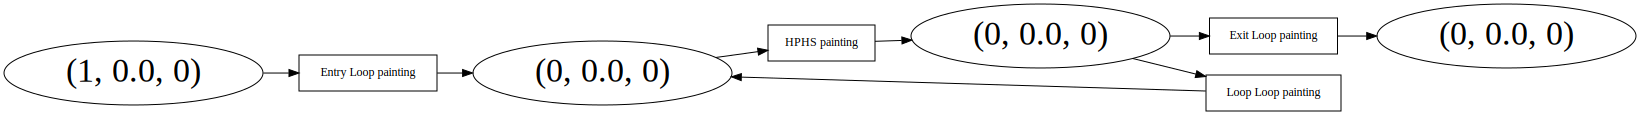

In [5]:
graph = graphviz.Source(petri_net_dot, format="svg")
display(graph)

# Execute choice

In [15]:
request_json = {
    'bpmn': bpmn,
    'petri_net': petri_net,
    'petri_net_dot': petri_net_dot,
    'execution_tree': execution_tree,
    # 'choices': ['6'] # id delle transizioni con stop da eseguire, se non vengono passati vengono presi i default
}

response = requests.post(f"http://{URL}:{PORT}/execute", headers={"Content-Type": "application/json"}, json=request_json)
response_json = response.json()

In [16]:
bpmn = response_json['bpmn']
petri_net = response_json['petri_net']
petri_net_dot = response_json['petri_net_dot']
execution_tree = response_json['execution_tree']

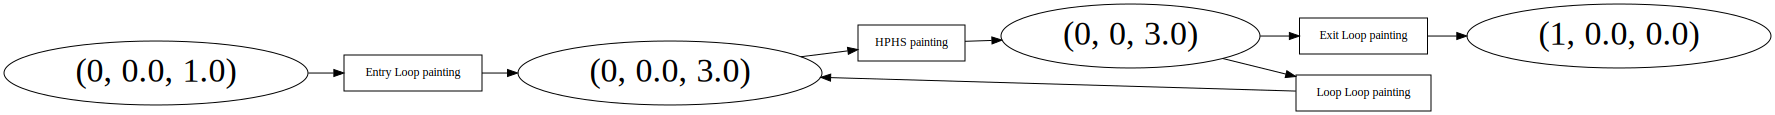

In [17]:
graph = graphviz.Source(petri_net_dot, format="svg")
display(graph)

In [ ]:
from model.endpoints.execute.request import ExecuteRequest

model = ExecuteRequest.model_validate_json(response.text)
extree = model.execution_tree_obj
extree_dot = "\n".join(DotExporter(extree.root))
display(graphviz.Source(extree_dot))